## Basic model with pair-wise homogeneous interaction

Explanation:

Particle movement: Each particle moves in a straight line for a random amount of time, after which it rests for a short time, then starts moving again in a new random direction.

Interaction: If two particles come within a certain distance (interaction_distance), they interact with each other. The force of interaction is proportional to the distance between the particles and the interaction_strength. This force can either attract or repel depending on the initial setup.

Visualization: The particles are visualized as green circles. The screen wraps around, so particles reappear from the opposite side when they reach the edges (toroidal space).

Customization:
You can adjust the number of particles, their speed, the interaction strength, or the distance at which they interact by modifying the corresponding variables at the start of the program.
You can also modify the interaction force by changing the formula within the interact function.

In [1]:
import pygame
import numpy as np
import random

# Simulation parameters
num_particles = 10
width, height = 300, 300
interaction_distance = 20
speed = 20
dt = 0.1

interaction_strength = -1 #(Repulsive if >0, Attractive if <0)

# Resting time is uniformly distributed: U(rest_time_min,rest_time_max)
move_time_min = 1  # The time a particle remains still
move_time_max = 5  # The time a particle remains still

# Resting time is uniformly distributed: U(rest_time_min,rest_time_max)
rest_time_min = 1 # The time a particle remains still
rest_time_max = 2 # The time a particle remains still


# Initialize Pygame
pygame.init()
screen = pygame.display.set_mode((width, height))
clock = pygame.time.Clock()

# Particle class
class Particle:
    def __init__(self):
        self.position = np.array([random.uniform(0, width), random.uniform(0, height)])
        self.velocity = np.zeros(2)  # Initial velocity set to zero
        self.move_time = random.uniform(move_time_min, move_time_max)  # Random time to move
        self.rest_time = random.uniform(rest_time_min, rest_time_max)  # Random rest time
        self.timer = self.move_time  # Start by moving
        self.moving = True

    def update(self):
        if self.moving:
            self.position += self.velocity * dt
            self.timer -= dt
            if self.timer <= 0:
                self.timer = self.rest_time  # Switch to rest
                self.moving = False
                self.velocity = np.zeros(2)
        else:
            self.timer -= dt
            if self.timer <= 0:
                self.timer = self.move_time  # Switch to moving
                self.moving = True
                angle = random.uniform(0, 2 * np.pi)
                self.velocity = np.array([np.cos(angle), np.sin(angle)]) * speed

        # Ensure particles wrap around the screen (toroidal space)
        self.position = np.mod(self.position, [width, height])

# Interaction function (repulsive/attractive)
def interact(particles):
    for i in range(len(particles)):
        for j in range(i+1, len(particles)):
            p1, p2 = particles[i], particles[j]
            distance = np.linalg.norm(p1.position - p2.position)
            if distance < interaction_distance:
                # Apply interaction force
                direction = (p1.position - p2.position) / distance
                force = interaction_strength * (interaction_distance - distance)
                p1.velocity += direction * force
                p2.velocity -= direction * force

pygame 2.6.1 (SDL 2.28.4, Python 3.11.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
import warnings
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt  # type: ignore
import matplotlib.ticker as mtick  # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

In [3]:
# Initialize particles
particles = [Particle() for _ in range(num_particles)]

# Main simulation loop
running = True
j = 0
df = []

while running and j<1001:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # Update particle positions and states
    for particle in particles:
        particle.update()

    # Handle interactions between particles
    interact(particles)

    # Clear screen
    screen.fill((0, 0, 0))

    # Draw particles
    n = 0
    for particle in particles:
        pygame.draw.circle(screen, (0, 255, 0), particle.position.astype(int), 5)

        # Update dataframe
        df.append(
            pd.DataFrame({
                "particle" : [n+1],
                "time": [j*dt],
                "x_1": particle.position[0],
                "x_2": particle.position[1],            
            })
        )
        n+=1

    pygame.display.flip()
    clock.tick(60)
    j+=1

pygame.quit()


In [4]:
df = pd.concat(df)
df

,particle,time,x_1,x_2
0,1,0.0,19.087889,119.740499
0,2,0.0,103.140062,218.745747
0,3,0.0,87.815371,1.156817
0,4,0.0,193.136225,75.229242
0,5,0.0,27.725063,106.156636
...,...,...,...,...
0,6,100.0,80.342670,154.609126
0,7,100.0,58.746769,89.802615
0,8,100.0,57.254764,279.431035
0,9,100.0,58.339141,173.472360


In [5]:
import matplotlib.animation as animation
print(animation.writers.list())

['pillow', 'html']


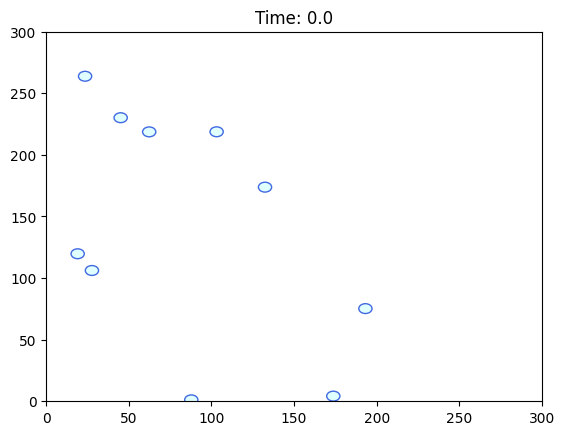

In [6]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

# Crear la figura y el eje para la animación
fig, ax = plt.subplots()
width, height = 300, 300  # Ajusta estos valores según tu espacio de trabajo
ax.set_xlim([0, width])
ax.set_ylim([0, height])

# Función de actualización para la animación
def update_plot(frame):
    ax.cla()  # Limpiar el eje en cada actualización
    ax.set_xlim([0, width])
    ax.set_ylim([0, height])

    # Filtrar el dataframe para el tiempo actual
    df_aux = df[df["time"] == frame]

    # Añadir un círculo por cada partícula en ese momento de tiempo
    for _, row in df_aux.iterrows():
        circle = plt.Circle((row["x_1"], row["x_2"]), radius=4, fc="lightcyan", ec="royalblue", lw=1)
        ax.add_patch(circle)

    ax.set_title(f"Time: {np.round(frame,2)}")

# Definir los cuadros de la animación (los valores únicos de tiempo en el DataFrame)
frames = df["time"].unique()

# Crear la animación
ani = animation.FuncAnimation(fig, update_plot, frames=frames, interval=200)  # Ajusta el intervalo (ms) según la velocidad deseada

# Guardar la animación como archivo MP4 o AVI
ani.save('particles_animation.gif', writer='pillow', fps=10)  # Para AVI puedes usar 'pillow' como writer: 'pillow'


In [8]:
from PIL import Image
import numpy as np
import pandas as pd
import trackpy as tp

# Load the GIF
gif_path = "particles_animation.gif"  # Replace with your GIF path
gif = Image.open(gif_path)

# Function to extract frames from the GIF
def extract_frames(gif):
    frames = []
    try:
        while True:
            frame = gif.copy()
            frames.append(frame)
            gif.seek(gif.tell() + 1)
    except EOFError:
        pass  # End of sequence
    return frames

# Extract frames from the GIF
frames = extract_frames(gif)

# Convert frames to numpy arrays for processing
frames_np = [np.array(frame.convert("RGB")) for frame in frames]

# Placeholder for tracking results
results = []

# Detect particles in each frame using Trackpy
for i, frame in enumerate(frames_np):
    # Convert to grayscale for easier detection of circles
    gray_frame = np.mean(frame, axis=2).astype(np.uint8)
    
    # Perform particle tracking using Trackpy
    features = tp.locate(gray_frame, diameter=11, minmass=100)
    features['frame'] = i
    results.append(features)

# Combine results into a single pandas DataFrame
particles_df = pd.concat(results, ignore_index=True)

# Show the first few rows of the result
print(particles_df.head())


           y           x         mass      size       ecc     signal  \
0  42.018692  297.124738  1667.165184  2.632417  0.496121  81.084708   
1  52.839955  327.858929  1424.547020  3.192730  0.268065  36.885592   
2  52.576665  348.946167  1518.032918  3.276658  0.184307  34.977717   
3  57.812177   44.030243   799.081844  2.671421  0.080862  40.701343   
4  62.840222   84.816532  1261.741646  2.939923  0.115241  45.789011   

   raw_mass   ep  frame  
0   14210.0 -0.0      0  
1   20267.0 -0.0      0  
2   20320.0 -0.0      0  
3   18728.0 -0.0      0  
4   20066.0 -0.0      0  


In [9]:
particles_df

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,42.018692,297.124738,1667.165184,2.632417,0.496121,81.084708,14210.0,-0.0,0
1,52.839955,327.858929,1424.547020,3.192730,0.268065,36.885592,20267.0,-0.0,0
2,52.576665,348.946167,1518.032918,3.276658,0.184307,34.977717,20320.0,-0.0,0
3,57.812177,44.030243,799.081844,2.671421,0.080862,40.701343,18728.0,-0.0,0
4,62.840222,84.816532,1261.741646,2.939923,0.115241,45.789011,20066.0,-0.0,0
...,...,...,...,...,...,...,...,...,...
35017,442.597514,79.928298,332.606291,2.149303,0.066726,48.650825,13640.0,-0.0,1000
35018,442.928231,323.149894,1200.689631,2.257462,0.271264,71.227351,14483.0,-0.0,1000
35019,442.868852,410.668197,484.918349,2.350863,0.132673,54.056472,13443.0,-0.0,1000
35020,443.517630,488.877856,1127.236425,2.317408,0.145305,65.503725,15474.0,-0.0,1000


In [11]:
print(particles_df.x.min(), particles_df.x.max())
print(particles_df.y.min(), particles_df.y.max())

44.01079734219269 579.7762982689748
37.634328358208954 443.52287581699346


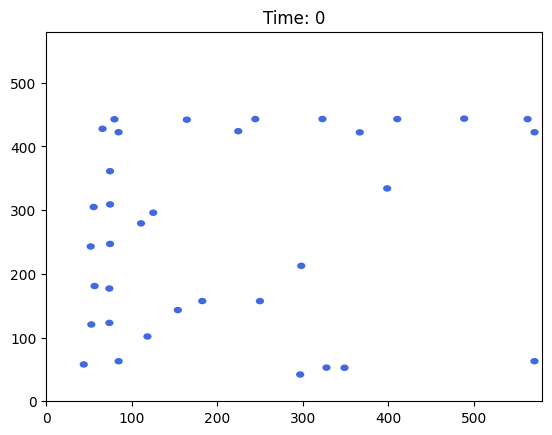

In [13]:
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt  # type: ignore
import matplotlib.animation as animation

# Crear la figura y el eje para la animación
fig, ax = plt.subplots()
width, height = 580, 580  # Ajusta estos valores según tu espacio de trabajo
ax.set_xlim([0, width])
ax.set_ylim([0, height])

# Función de actualización para la animación
def update_plot(frame):
    ax.cla()  # Limpiar el eje en cada actualización
    ax.set_xlim([0, width])
    ax.set_ylim([0, height])

    # Filtrar el dataframe para el tiempo actual
    df_aux = particles_df[particles_df["frame"] == frame]

    # Añadir un círculo por cada partícula en ese momento de tiempo
    for _, row in df_aux.iterrows():
        circle = plt.Circle((row["x"], row["y"]), radius=4, fc="royalblue", ec="royalblue", lw=1)
        ax.add_patch(circle)

    ax.set_title(f"Time: {np.round(frame,2)}")

# Definir los cuadros de la animación (los valores únicos de tiempo en el DataFrame)
frames = particles_df["frame"].unique()

# Crear la animación
ani = animation.FuncAnimation(fig, update_plot, frames=frames, interval=200)  # Ajusta el intervalo (ms) según la velocidad deseada

# Guardar la animación como archivo MP4 o AVI
ani.save('particles_animation_recovered.gif', writer='pillow', fps=10)  # Para AVI puedes usar 'pillow' como writer: 'pillow'
